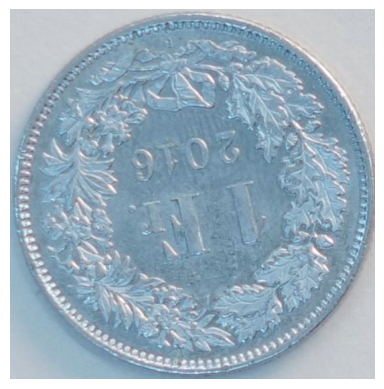

In [6]:
import cv2
import os
import json
import matplotlib.pyplot as plt
from IPython.display import clear_output
path = "output"

# Load all the image in output folder

possible_value = ["5chf", "2chf", "1chf", "0.5chf", "0.2chf", "0.1chf", "0.05chf", "2eur", "1eur", "0.5eur", "0.2eur", "0.1eur", "0.05eur", "0.02eur", "0.01eur", "odd"]
print(len(possible_value))
images_json = []

# Load json
if os.path.exists("data.json"):
    with open("data.json", "r") as f:
        images_json = json.load(f)


for filename in sorted(os.listdir(path)):
    if(filename.endswith(".json")):
        continue
    if(filename in [img["filename"] for img in images_json]):
        print("Already annotated")
        continue
    print(filename)
    for i in range(len(possible_value)):
        print(f"{i}: {possible_value[i]}")
    plt.imshow(cv2.imread(f"{path}/{filename}"))
    plt.axis('off')
    plt.show()
    result = input("Value of coin :")
    if result == "q":
        # Save json file 
        #with open("data.json", "w") as f:
        #    json.dump(images_json, f, indent=4)
        break
    else:
        images_json.append({"filename": filename, "value": result})
    clear_output(wait=True)

with open("data.json", "w") as f:
    json.dump(images_json, f, indent=4)
    